# Обучение без учителя
## Кластеризация

Кластеризация позволяет разбить объекты на группы, которые называются **кластерами**.

**Центроид** — это центр масс кластера, или среднее значение координат объектов кластера.

### АЛГОРИТМ K-MEANS (K-СРЕДНИХ)

>Идея алгоритма состоит в том, что он разбивает множество элементов векторного пространства на заранее заданное пользователем число кластеров, а далее стремится минимизировать суммарное квадратичное отклонение объектов внутри кластера до центроида кластера.
$$ V = \sum_{i=1}^{k} \sum_{x\in S_{i}} (x - \mu_{i})^2 $$
Мы итерируемся по каждому кластеру и для всех векторов $x$ внутри кластера $S_i$ подсчитываем центроиды ($\mu_i$). Далее рассчитываем разницу между каждым вектором $x$ кластера $S_i$ и центроидом кластера $S_i$. Необходимо, чтобы это значение, возведённое в квадрат ($V$), было минимальным для каждого кластера.
Алгоритм состоит из девяти шагов:
1. Решаем, на сколько кластеров ($k$) разделить данные.
2. Случайным образом выбираем $k$ объектов, которые будут представлять $k$ разных кластеров. Так как в этих кластерах находится по одному объекту, то эти объекты будут считаться исходными центроидами кластеров.
3. Распределим оставшиеся объекты по $k$ классам.
   >Считается, что объект принадлежит к тому кластеру, к центроиду которого он находится ближе всего.
4. Рассчитаем новые центроиды получившихся кластеров.
5. Повторяем шаг 3 для каждого объекта.
6. Повторяем шаг 5 до тех пор, пока кластеры не стабилизируются, т.е. объекты перестанут переходить из одного кластера в другой.
7. Для каждого кластера подсчитываем среднеквадратичное отклонение объектов кластера до центроида.
8. Нескольк раз повторяем алгоритм, начиная с шага 2.
9. Среди получившихся вариантов кластеризации находим оптимальный (с минимальным значением среднеквадратичного отклонения).

In [1]:
from sklearn.cluster import KMeans

Параметры метода KMeans:
* *n_clusters* — количество кластеров. По умолчанию — 8.
* *init* — способ инициализации центроидов. Есть две опции: *random* (выбирает центроиды случайным образом) и *k-means++* (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). По умолчанию используется *k-means++*.
* *n_init* — количество случайных инициализаций алгоритма k-means. В конце будут выбраны те результаты, которые имеют наилучшие значения критерия k-means. По умолчанию *n_init* = 10.
* *max_iter* — максимальное количество итераций алгоритма k-means при одном запуске. По умолчанию — 300.
* *random_state* — параметр, который определяет генерацию случайных чисел для инициализации центроида. Чтобы детерминировать случайность, нужно задать какое-нибудь число.

In [2]:
import pandas as pd

# загружаем данные
df = pd.read_csv('data/pokemon.csv')

X = df[['Attack', 'Defense']]

# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

#### НЕДОСТАТКИ АЛГОРИТМА K-MEANS
* Необходимо заранее знать, на сколько кластеров мы хотим разделить данные. В учебных примерах известно, каким должно быть k, и определить это значение довольно легко. В реальности данные сложнее и трудно заранее предугадать, сколько кластеров мы хотим получить.
* Очевидно, что для объектов, которые в равной степени принадлежат к разным кластерам, алгоритм k-means будет отрабатывать плохо.
* Алгоритм чувствителен к выбросам в данных, так как выбросы сильно искажают местонахождение центроида кластера.
* Плохо работает на данных, которые образуют удлинённые кластеры, а также на кластерах неправильной формы.
* Так как в самом начале работы алгоритма центроиды определяются случайным образом, результат сильно зависит от того, какие начальные объекты будут определены как центры кластеров.

#### ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОГО K ДЛЯ АЛГОРИТМА K-MEANS
##### Метод локтя

>Данный метод позволяет найти такое оптимальное число кластеров, чтобы добавление ещё одного кластера не приводило к лучшему моделированию данных. \
Идея состоит в том, что в самом начале при добавлении новых кластеров качество моделирования улучшается. Эта область называется **недообученной (underfitting)**. \
Дальнейшее добавление новых кластеров существенно не улучшает качество моделирования, а значит стоит прекратить их добавление. Данная область называется **переобученной (overfitting)**.

Инерция — это сумма квадратов расстояний объектов датасета до центра масс ближайшего к ним кластера.
Когда инерция быстро снижается, область считается недообученной, а далее, после «перегиба», идёт очень медленное снижение инерции, и область считается переобученной.


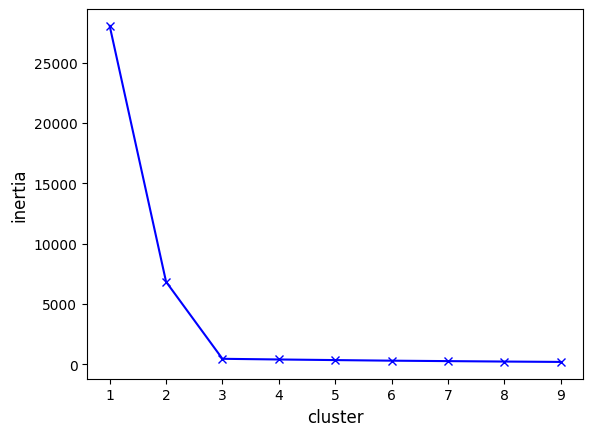

In [3]:
import matplotlib.pyplot as plt

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

>В данном случае оптимальное количество кластеров равно 3. 

##### Коэффициент силуэта

**Коэффициент силуэта** показывает, насколько объект похож на объекты кластера, в котором он находится, по сравнению с объектами из других кластеров.

Для каждой точки датасета рассчитывается значение силуэта:
$$ s_{i} = \frac{(b_{i}-a_{i})}{max(a_{i},b_{i})}, $$
где $a_i$ — среднее расстояние до точек кластера, к которому относится текущая точка, $b_i$ — среднее расстояние до точек кластера, ближайшего к тому, к которому относится текущая точка.

Далее рассчитывается среднее значение силуэта для всего датасета.

<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

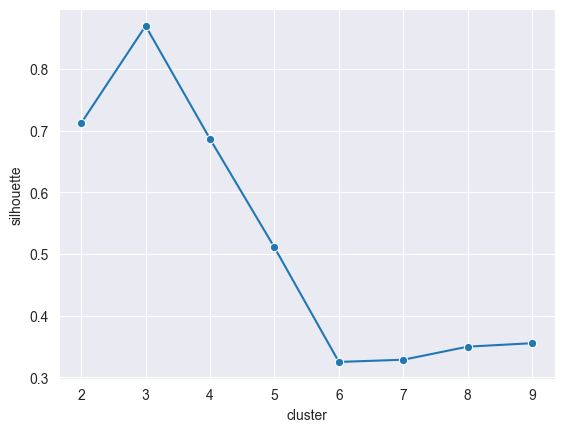

In [4]:
import seaborn as sns
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

На графике для метода силуэта отчётливо виден пик с наибольшим значением коэффициента силуэта. Значит, оптимальное количество кластеров равно 3.

### МЕТРИКИ

#### ОДНОРОДНОСТЬ КЛАСТЕРОВ (HOMOGENEITY SCORE) — размеченные данные
Кластер считается однородным, если в нём содержатся объекты, принадлежащие только к одному кластеру.

In [5]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
print(homogeneity_score(labels_true=[0, 0, 0, 0], labels_pred=[1, 1, 0, 0]))

1.0
1.0


#### ПОЛНОТА КЛАСТЕРА (COMPLETENESS SCORE) — размеченные данные
Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру. Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, при кластеризации оказались в одном кластере.

In [6]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
print(completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
print(completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 2]))

1.0
0.6666666666666666


#### V-МЕРА (V-MEASURE) — размеченные данные
Эта метрика — комбинация метрик полноты и однородности. Значение V-меры варьируется от 0 до 1. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно. V-мера рассчитывается по формуле:
$$ v = \frac{(1 + \beta) \times homogeneity \times completeness}{(\beta \times homogeneity + completeness)} $$

In [7]:
# импортируем из библиотеки sklearn подсчёт V-меры
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

print(v_measure_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 2]))

1.0
0.7999999999999999


#### ИНДЕКС РЭНДА — размеченные данные
Данный индекс подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере, среди предсказанных и размеченных данных.
$$ Rand \ Index = \frac{number \ of \ agreeing \ pairs}{number \ of \ pairs} $$
По сути, данная метрика подсчитывает, для какой доли объектов датасета мы правильно определили кластер.

In [8]:
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score

# посчитаем V-меру для кластеров с покемонами
print(rand_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

print(rand_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 2]))

1.0
0.8333333333333334


### ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ

Принцип иерархической кластеризации основан на построении дерева (иерархии) вложенных кластеров. При иерархической кластеризации строится **дендрограмма**.
>Дендрограмма  — это древовидная диаграмма, которая содержит  уровней. Каждый уровень — это шаг укрупнения кластеров.

При иерархической кластеризации выделяют два подхода: **агломеративный** и **дивизионный**. В первом случае кластеры образуются снизу вверх, т. е. при объединении кластеров, а во втором — сверху вниз, в ходе деления крупных кластеров:

![tree clustering approaches](data/tree_clust_div_agl.png "Tree clustering approaches")

Чтобы построить дендрограмму, создается **матрица сходства**, основанная на расстоянии между кластерами.

#### Методы определения расстояния между клакстерами

* **Метод одиночной связи (single linkage).** Поиск минимального расстояния между объектами из разных кластеров.
* **Метод полной связи (complete (maximum) linkage).** Поиск максимального расстояния между объектами из разных кластеров.
* **Метод средней связи (pair group method using arithmetic mean).** Расстояние между двумя кластерами считается как среднее от расстояния между элементами этих кластеров.
* **Центроидный метод (centroid).** Расстояния между кластерами рассчитываются как расстояния между центроидами этих кластеров.

>Методы средней связи и полной связи приносят хорошие результаты только при условии, что данные имеют высокую плотность и не пересекаются, или же для однородно распределённых данных. В остальных случаях они отрабатывают плохо.

#### ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ?
* Для построения филогенетического дерева.
* Для анализа текстов.

Базовые параметры метода AgglomerativeClustering
* *n_clusters* — количество кластеров; по умолчанию — 2.
* *linkage* — метод определения расстояния между кластерами, которое мы рассматривали выше. Можно выбрать *single*, *ward*, *average*, *complete*; по умолчанию используется *ward* (метода Уорда).

#### ПРЕИМУЩЕСТВА ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ
* Можно построить дендрограмму и понять, как устроены данные.
* Работает на небольшом датасете.

#### НЕДОСТАТКИ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ
* Необходимость выбора оптимального количества кластеров.
* Если данных много, дендрограмма становится большой и сложной для понимания.
* Может неравномерно разделять данные на кластеры.

### EM-АЛГОРИТМЫ (Expectation-maximization) КЛАСТЕРИЗАЦИИ

В основе данного подхода лежит предположение, что любой объект принадлежит ко всем кластерам, но с разной вероятностью. Каждая итерация алгоритма состоит из двух шагов. На E-шаге (*expectation*) вычисляется ожидаемое значение функции правдоподобия, при этом скрытые переменные рассматриваются как наблюдаемые. На M-шаге (*maximization*) вычисляется оценка максимального правдоподобия, таким образом увеличивается ожидаемое правдоподобие, вычисляемое на E-шаге. Затем это значение используется для E-шага на следующей итерации. Алгоритм выполняется до сходимости.

**Примеры**
* k-means.
* Модель гауссовой смеси (Gaussian Mixture Model, GMM), в которой данные описываются функцией Гаусса. Это значит, что мы можем выделить два параметра для описания кластеров: среднее значение и стандартное отклонение.

#### ПРЕИМУЩЕСТВА EM-КЛАСТЕРИЗАЦИИ
* Кластеры, которые находит этот алгоритм, могут принимать форму эллипса, а не ограничиваться окружностями. K-Means является частным случаем GMM.
* Если объект находится в середине двух перекрывающихся кластеров, то, в отличие от k-means, не нужно решать, к какому кластеру он принадлежит: объект может принадлежать к двум разным кластерам с разной вероятностью.

#### НЕДОСТАТКИ EM-КЛАСТЕРИЗАЦИИ
* Нужно задавать количество кластеров.
* Чувствителен к тому, с какой точки начинается алгоритм.
* Может медленно сходиться, т. е. искать, как оптимально описать кластеры.

### СПЕКТАРЛЬНАЯ КЛАСТЕРИЗАЦИЯ